In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

In [7]:
import sys
sys.path.insert(0,'/content/')

In [3]:
from datetime import timedelta, datetime

import numpy as np
import yfinance as yf



In [8]:
fi_data = yf.download('IVVB11.SA MATB11.SA', start="2020-03-18", end="2023-02-28")
data=fi_data['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [4]:
from optfolio.optimize import Optimizer

ModuleNotFoundError: ignored

In [10]:
daily_returns = (data/ data.shift(1) - 1)[1:]
daily_returns.head()

,IVVB11.SA,MATB11.SA
Date,,
2020-03-19,-0.016854,0.006033
2020-03-20,-0.047619,-0.005996
2020-03-23,-0.008000,-0.045012
2020-03-24,0.088710,0.060253
2020-03-25,-0.006296,0.085243


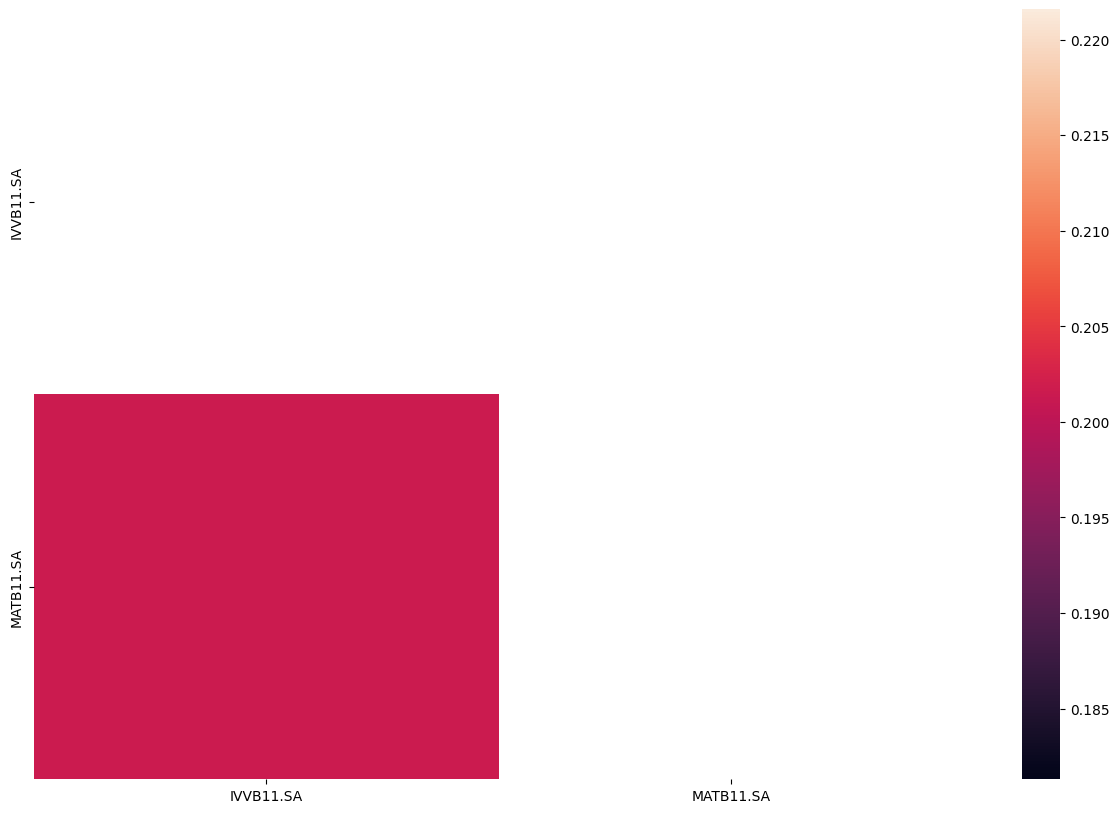

In [11]:
import seaborn as sns

plt.figure(figsize=(15,10))
cm = daily_returns.corr()
mask = (1 - np.tril(np.ones_like(cm))) == 1
cm[np.eye(cm.shape[0]) == 1] = np.nan
cm[mask] = np.nan
# cm[cm <= 0.5] = np.nan
sns.heatmap(cm)
plt.show()

In [12]:
spy_data = yf.download(tickers='SPY', period=PERIOD, interval='1d', auto_adjust=True, prepost=False)
spy_daily_returns = (spy_data['Adj Close'] / spy_data['Adj Close'].shift(1) - 1)[1:]
spy_daily_returns.head()

NameError: ignored

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(np.cumprod(spy_daily_returns + 1) - 1, label='S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative return')
plt.legend()
plt.show()

NameError: ignored

<Figure size 2000x1000 with 0 Axes>

optimization

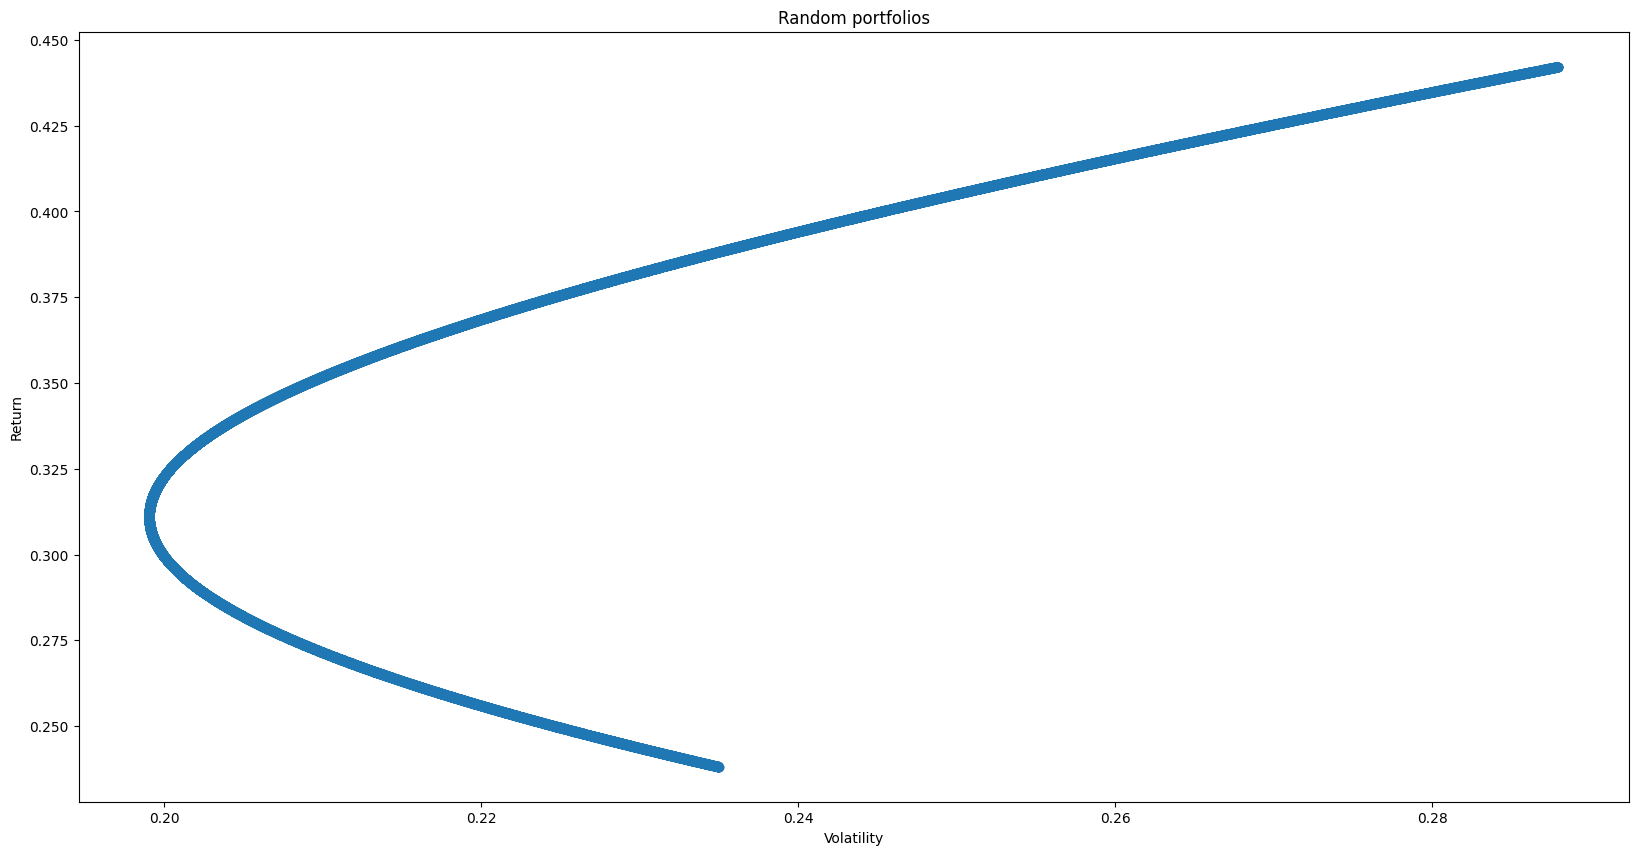

In [15]:
def random_population(n_assets, population_size):
    weights = np.random.uniform(0, 1, size=(population_size, n_assets))

    return weights / weights.sum(axis=-1).reshape((-1, 1))

def annualized_portfolio_return(returns, weights):
    weighted_returns = np.matmul(weights, np.mean(returns.values, 0))

    return (weighted_returns + 1) ** YEAR_BARS - 1


def annualized_portfolio_volatility(returns, weights):
    variance = np.sum(weights * np.matmul(weights, np.cov(returns.T.values)), -1)

    return np.sqrt(variance) * np.sqrt(YEAR_BARS)


def annualized_portfolio_performance(returns, weights):
    return np.stack([
        annualized_portfolio_return(returns, weights),
        annualized_portfolio_volatility(returns, weights)
    ], -1)

rand_weights = random_population(train.shape[1], 100000)
rand_solutions = annualized_portfolio_performance(train, rand_weights)

plt.figure(figsize=(20,10))
plt.title('Random portfolios')
plt.scatter(rand_solutions[:,1], rand_solutions[:,0], alpha=.5)
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [16]:
optimizer = Optimizer(mutation_sigma=1.0, verbose=False, max_iter=250, population_size=5000)
solutions, stats = optimizer.run(train.values)

NameError: ignored

In [17]:
solutions.shape

NameError: ignored

In [18]:
def plot_solutions(data, solutions, rand_solutions):
    ov = annualized_portfolio_performance(data, solutions)
    plt.figure(figsize=(20,10))
    plt.title('Solutions')
    plt.scatter(rand_solutions[:,1], rand_solutions[:,0], alpha=.5)
    plt.scatter(ov[:,1], ov[:,0], alpha=.5)
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    plt.show()

plot_solutions(train, solutions, rand_solutions)

NameError: ignored

In [19]:
ov = annualized_portfolio_performance(train, solutions)
sharpe = ov[:,0] / ov[:,1]
# solution = solutions[np.argmin(np.abs(ov[:,1] - 0.16))]
solution = solutions[np.argmax(ov[:,0] / ov[:,1])]
annualized_portfolio_performance(train, solution)

NameError: ignored

In [20]:
CAPITAL = 1000

def print_allocation(data, allocations, prices):
    for ticker_id in np.argsort(-allocations):
        print('%s - %.4f, $%.2f USD, %.2f shares' % (data.columns[ticker_id], allocations[ticker_id] * 100, CAPITAL * allocations[ticker_id], (CAPITAL * allocations[ticker_id]) / prices[data.columns[ticker_id]]))

print_allocation(train, solution, data['Adj Close'].iloc[-1])

NameError: ignored

In [22]:
from optfolio.returns_projection import cumulative_n_period_returns, sample_returns, mcmc_sample_returns
from optfolio.report import plot_traces, returns_table

ModuleNotFoundError: ignored

In [21]:
ret = np.dot(train, solution)
plt.hist(ret, bins=1000)
plt.show()

NameError: ignored

In [23]:
from optfolio.returns_projection import cumulative_n_period_returns, sample_returns, mcmc_sample_returns
from optfolio.report import plot_traces, returns_table

ModuleNotFoundError: ignored

S&P 500 MC Projection

In [24]:
print("Annualized return: %.6f" % (np.mean(spy_train + 1) ** 252 - 1))
print("Annualized volatility: %.6f" % (np.sqrt(np.var(spy_train) * 252)))

NameError: ignored

In [25]:
spy_traces = sample_returns(spy_train, 10 * 252, n_traces=100000)

NameError: ignored

In [26]:
spy_cum_returns = plot_traces(spy_traces)
returns_table(spy_cum_returns)

NameError: ignored

In [14]:
YEAR_BARS = 252
TEST_YEARS = 0
TRAIN_END_DATE = data.index.max() - timedelta(days=TEST_YEARS * 365)
train = daily_returns[(daily_returns.index < TRAIN_END_DATE)].fillna(0)
test = daily_returns[(daily_returns.index >= TRAIN_END_DATE)].fillna(0)

spy_train = spy_daily_returns[(spy_daily_returns.index < TRAIN_END_DATE)].fillna(0)
spy_test = spy_daily_returns[(spy_daily_returns.index >= TRAIN_END_DATE)].fillna(0)

print(np.any(np.isnan(train)))
print(train.shape)
train.tail()

NameError: ignored